<a href="https://colab.research.google.com/github/iandvecchia/adm01007/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dicionário dos Dados: 
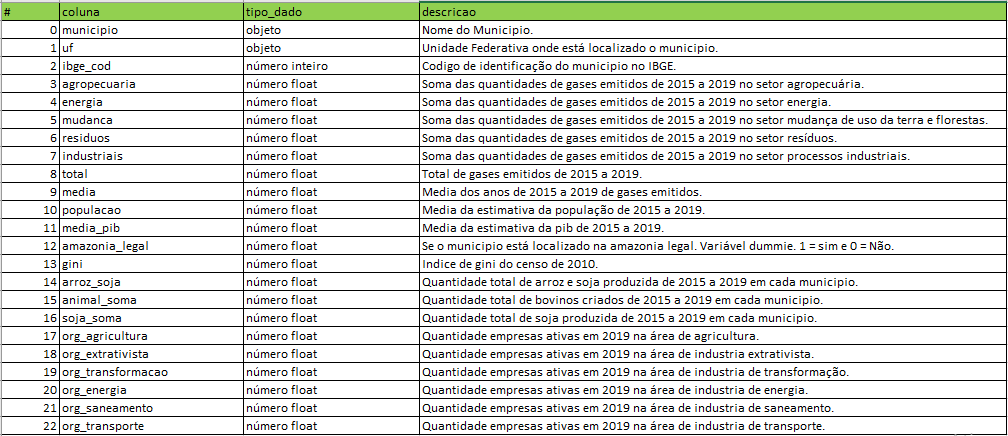

## 1. Importação das Bibliotecas e autorização de acesso ao google drive:

In [37]:
import pandas as pd
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Importação da Base de Dados:

In [39]:
df = pd.read_excel('/content/drive/MyDrive/intro_data_science/data_10.xlsx')

## 3. Apresentação da Base de Dados:

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   municipio          5570 non-null   object 
 1   uf                 5570 non-null   object 
 2   ibge_cod           5570 non-null   int64  
 3   agropecuaria       5570 non-null   float64
 4   energia            5570 non-null   float64
 5   mudanca            5570 non-null   int64  
 6   residuos           5570 non-null   float64
 7   industriais        5570 non-null   float64
 8   total              5570 non-null   float64
 9   media              5570 non-null   float64
 10  populacao          5570 non-null   int64  
 11  media_pib          5570 non-null   float64
 12  amazonia_legal     5570 non-null   int64  
 13  gini               5570 non-null   float64
 14  arroz_soja         5570 non-null   int64  
 15  animal_soma        5570 non-null   int64  
 16  soja_soma          5570 

In [41]:
df.head()

,municipio,uf,ibge_cod,agropecuaria,energia,mudanca,residuos,industriais,total,media,populacao,media_pib,amazonia_legal,gini,arroz_soja,animal_soma,soja_soma,org_agricultura,org_extrativista,org_transformacao,org_energia,org_saneamento,org_transporte
0,Abadia de Goiás,GO,5200050,182059.811,24109.826,9260,14761.242,0.000,230190.879,46038.176,8773,191191.418,0,0.426,378,85524,2936,4,0,74,0,4,27
1,Abadia dos Dourados,MG,3100104,651129.889,35262.553,-6375,27595.828,0.000,707613.269,141522.654,6989,151121.614,0,0.474,4341,294216,43382,2,7,27,1,1,54
2,Abadiânia,GO,5200100,630704.363,224335.639,79132,35296.036,0.000,969468.038,193893.608,20042,311331.299,0,0.443,12649,271240,126409,13,9,24,0,3,9
3,Abaeté,MG,3100203,1123977.631,106487.511,6180,98284.347,0.000,1334929.489,266985.898,23237,441745.082,0,0.551,7637,518689,7613,31,1,32,1,2,64
4,Abaetetuba,PA,1500107,127900.682,316338.028,169566,209062.941,0.000,822867.651,164573.530,157698,1336336.884,1,0.539,12,30194,0,13,3,51,1,0,14


In [42]:
df.describe()

,ibge_cod,agropecuaria,energia,mudanca,residuos,industriais,total,media,populacao,media_pib,amazonia_legal,gini,arroz_soja,animal_soma,soja_soma,org_agricultura,org_extrativista,org_transformacao,org_energia,org_saneamento,org_transporte
count,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000,5570.000
mean,3253590.771,502526.464,299214.949,199322.002,76788.223,35713.104,1113564.741,222712.948,37841.217,1193675.619,0.139,0.502,55649.101,193341.882,97095.357,18.192,1.929,70.118,0.892,2.249,40.460
std,984910.339,1018912.559,1610390.115,3566277.281,549048.431,741320.561,4645423.345,929084.669,221134.119,11697158.783,0.346,0.066,285419.225,453741.162,410800.423,78.167,6.467,460.958,11.059,12.005,283.585
min,1100015.000,54.529,0.000,-87092164.000,-5229974.397,0.000,-86825629.970,-17365125.994,781.000,13604.477,0.000,0.284,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2512125.750,93281.577,12781.427,-11957.250,10543.747,0.000,157656.083,31531.217,5410.000,79434.673,0.000,0.458,0.000,27858.250,0.000,1.000,0.000,3.000,0.000,0.000,2.000
50%,3146280.000,198577.742,39226.666,20867.500,21428.414,0.000,368734.756,73746.951,11584.000,176295.608,0.000,0.501,143.000,65207.000,0.000,3.000,0.000,11.000,0.000,0.000,7.000
75%,4119189.500,450082.580,140989.768,98139.000,49393.012,0.000,931215.931,186243.186,25387.250,470176.179,0.000,0.545,7260.500,158946.000,23693.250,9.000,2.000,38.000,0.000,1.000,25.000
max,5300108.000,22382972.512,65348156.929,97394819.000,26734316.370,46540144.145,113085488.384,22617097.677,12252023.000,702785457.864,1.000,0.808,6235111.000,11162054.000,10254210.000,2055.000,292.000,28865.000,475.000,660.000,18232.000


In [43]:
df.groupby(['ibge_cod', 'municipio'])[['ibge_cod']].count()

,,ibge_cod
ibge_cod,municipio,
1100015,Alta Floresta D'Oeste,1
1100023,Ariquemes,1
1100031,Cabixi,1
1100049,Cacoal,1
1100056,Cerejeiras,1
...,...,...
5222005,Vianópolis,1
5222054,Vicentinópolis,1
5222203,Vila Boa,1


In [44]:
quantidade_por_estado = pd.DataFrame(
    df.groupby(
        by='uf'
    )[['agropecuaria', 'energia', 'mudanca', 'residuos', 'industriais']].sum()
)

quantidade_por_estado['total'] = quantidade_por_estado['agropecuaria'] + quantidade_por_estado['energia'] + quantidade_por_estado['mudanca'] + quantidade_por_estado['residuos'] + quantidade_por_estado['industriais']

print(quantidade_por_estado.sort_values(by='total', ascending=False).head(10))

    agropecuaria       energia    mudanca     residuos  industriais  \
uf                                                                    
MT 381342447.672  51418442.771  438797728  6911522.166  2066442.296   
SP 173160103.945 411961541.158   21353148 80708502.228 16709892.427   
PA 220098233.763  54978032.537  394249125 14454191.688  5131165.114   
MG 292770052.886 168770489.334   40791735 43084759.719 58501771.735   
RO 142231570.285  14057161.392  310301605  3644377.707        0.000   
RS 250683487.798 106881319.670   25840784 23708691.078  2209546.965   
GO 275689862.564  56127333.139   23874809 14885291.033  2707278.903   
PR 158567756.838 109822475.456   37558917 26270018.080 10975105.634   
MS 243935744.032  32939681.425   31243854  6155162.577  1290037.398   
MA  87695838.259  58404506.906  118196930 11023880.753    60354.184   

           total  
uf                
MT 880536582.906  
SP 703893187.759  
PA 688910748.103  
MG 603918808.673  
RO 470234714.384  
RS 409323829.5

In [45]:
quantidade_por_municipio = pd.DataFrame(
    df.groupby(
        by='municipio'
    )[['agropecuaria', 'energia', 'mudanca', 'residuos', 'industriais']].sum()
)

quantidade_por_municipio['total'] = quantidade_por_municipio['agropecuaria'] + quantidade_por_municipio['energia'] + quantidade_por_municipio['mudanca'] + quantidade_por_municipio['residuos'] + quantidade_por_municipio['industriais']

print(quantidade_por_municipio.sort_values(by='total', ascending=False).head(10))

                    agropecuaria      energia   mudanca     residuos  \
municipio                                                              
Porto Velho         10043555.371  4735711.340  97394819   911402.674   
São Paulo              26930.872 65348156.929    115411 21319447.541   
São Félix do Xingu  22382972.512   340372.505  49488928   171350.200   
Rio de Janeiro        118008.888 32904622.278     56023 26734316.370   
Pacajá               6008032.966   106254.463  53952265    54928.003   
Nova Mamoré          6540440.304   204341.896  46406203    53070.683   
Colniza              5636428.330   303269.916  46850841    45893.433   
Serra                 191614.637  3800875.810     75448  1455179.067   
Novo Repartimento    9392060.911   248733.887  37455770   105997.399   
Lábrea               3199371.616   125965.244  39594741   105379.455   

                    industriais         total  
municipio                                      
Porto Velho               0.000 1130854

## 4. Correlação de Pearson:

In [46]:
df.corr(method='pearson')

,ibge_cod,agropecuaria,energia,mudanca,residuos,industriais,total,media,populacao,media_pib,amazonia_legal,gini,arroz_soja,animal_soma,soja_soma,org_agricultura,org_extrativista,org_transformacao,org_energia,org_saneamento,org_transporte
ibge_cod,1.000,0.168,0.023,0.012,0.004,0.003,0.055,0.055,-0.001,0.017,-0.146,-0.372,0.176,0.107,0.249,0.078,0.051,0.055,0.015,0.056,0.060
agropecuaria,0.168,1.000,0.039,0.325,0.022,-0.011,0.483,0.483,0.018,0.006,0.110,0.159,0.270,0.964,0.346,0.056,0.095,0.004,-0.003,0.022,0.023
energia,0.023,0.039,1.000,0.011,0.690,0.149,0.469,0.469,0.777,0.045,-0.014,0.071,0.023,0.025,0.044,0.174,0.476,0.711,0.604,0.779,0.733
mudanca,0.012,0.325,0.011,1.000,0.006,-0.002,0.843,0.843,0.011,-0.000,0.053,-0.004,0.068,0.353,0.078,0.005,0.032,0.004,0.002,0.011,0.002
residuos,0.004,0.022,0.690,0.006,1.000,0.206,0.399,0.399,0.907,0.038,-0.005,0.095,0.004,0.015,0.012,0.164,0.666,0.762,0.830,0.837,0.773
industriais,0.003,-0.011,0.149,-0.002,0.206,1.000,0.231,0.231,0.151,0.003,-0.013,0.008,-0.009,-0.010,-0.007,0.009,0.220,0.088,0.149,0.146,0.091
total,0.055,0.483,0.469,0.843,0.399,0.231,1.000,1.000,0.413,0.022,0.057,0.069,0.118,0.491,0.151,0.097,0.324,0.355,0.332,0.406,0.367
media,0.055,0.483,0.469,0.843,0.399,0.231,1.000,1.000,0.413,0.022,0.057,0.069,0.118,0.491,0.151,0.097,0.324,0.355,0.332,0.406,0.367
populacao,-0.001,0.018,0.777,0.011,0.907,0.151,0.413,0.413,1.000,0.040,-0.009,0.107,0.002,0.011,0.010,0.187,0.575,0.916,0.830,0.949,0.924
media_pib,0.017,0.006,0.045,-0.000,0.038,0.003,0.022,0.022,0.040,1.000,-0.017,0.005,0.003,0.006,0.000,0.015,0.027,0.043,0.035,0.048,0.037


<AxesSubplot:>

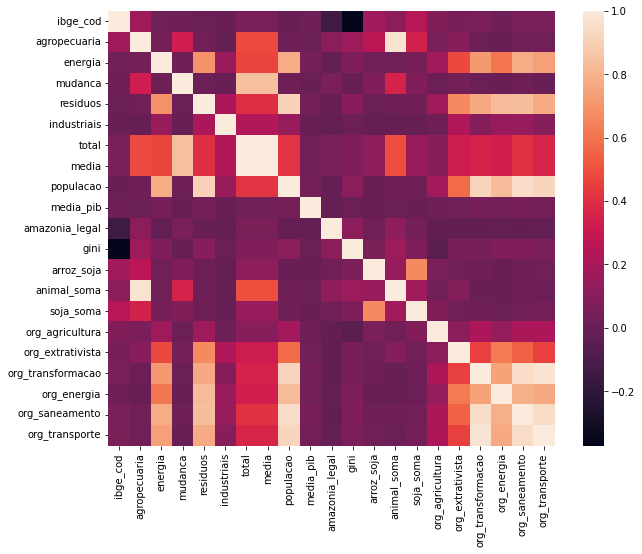

In [47]:
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr())

## 5. Modelo Regressão Linear Simples: 
Setor Agropecuária e quantidade de cabeças de gado:



In [48]:

x = df[['animal_soma']]
y = df['agropecuaria']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=10)


In [49]:

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [50]:


lr = LinearRegression()
lr.fit(x_train, y_train)

c = lr.intercept_
m = lr.coef_

print(c, m)

78279.47538381751 [2.21024486]


In [51]:
y_pred_train = lr.predict(x_train)

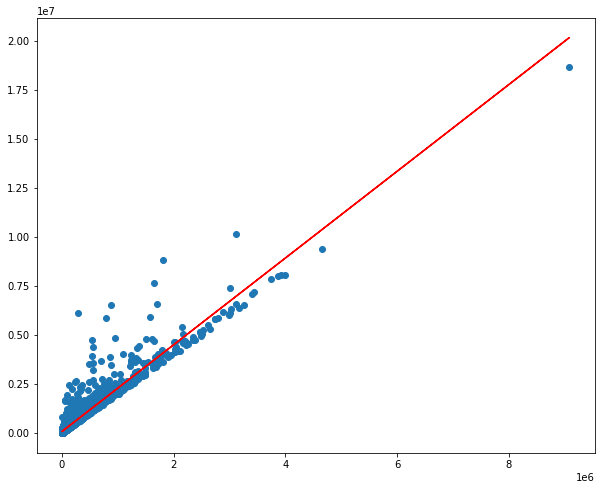

In [52]:
plt.subplots(figsize=(10,8))
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color='red')

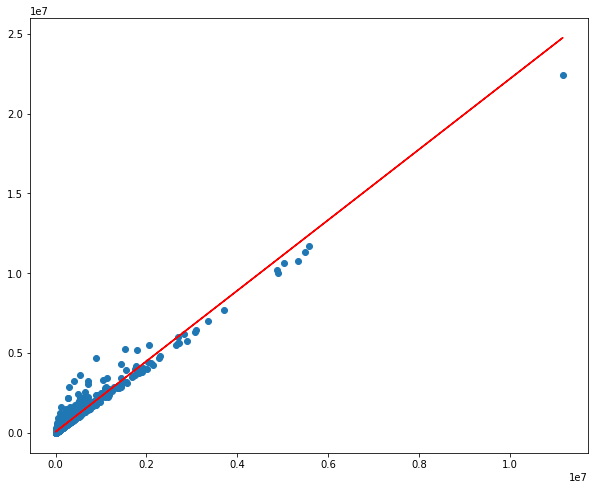

In [53]:
plt.subplots(figsize=(10,8))
y_pred_test = lr.predict(x_test)
y_pred_test

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color='red')

## 6. Modelo de Regressão Linear Multipla: 
Energia: populacao, org_transformacao, org_energia, org_saneamento, org_transporte. 


In [54]:
x = df[['org_transporte', 'populacao', 'org_transformacao', 'org_energia', 'org_saneamento']]
y = df[['energia']]

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

(5570, 5)
(5570, 1)


In [55]:

lr = LinearRegression()


In [56]:
lr.fit(x_train, y_train)

c = lr.intercept_
m = lr.coef_

print(c, m)

[57323.3555245] [[ 1.08866096e+03  4.02794323e+00 -1.81755911e+03 -2.52113387e+04
   9.48606289e+04]]


[[ 81422.53985152]
 [174245.78583458]
 [126768.3275509 ]
 ...
 [325071.05560635]
 [103410.5624206 ]
 [385055.12961175]]
0.6370243195658736


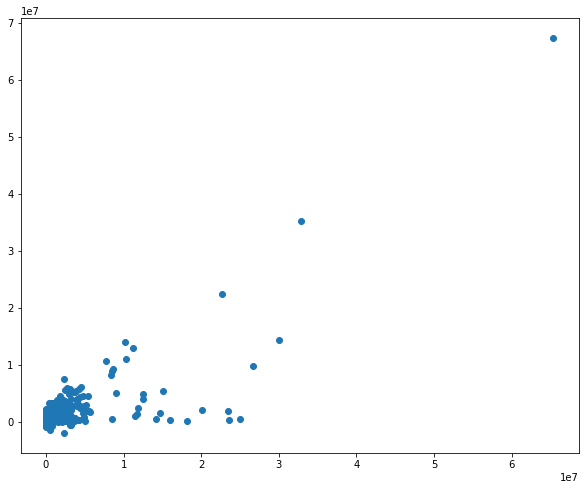

In [57]:
plt.subplots(figsize=(10,8))
y_pred_train = lr.predict(x_train)
print(y_pred_train)


print(r2_score(y_train, y_pred_train))

plt.scatter(y_train, y_pred_train)

0.6726090991416771

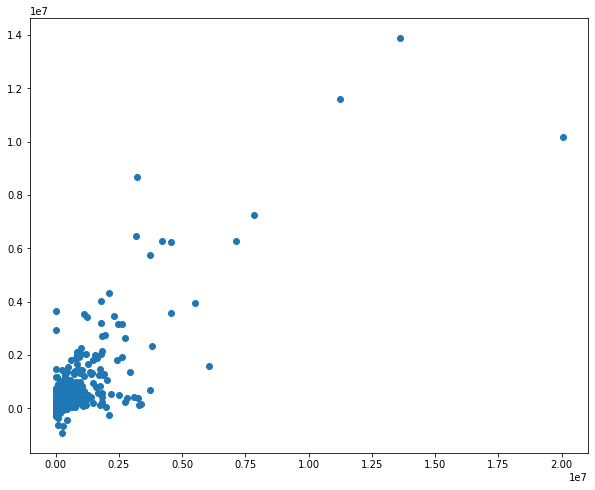

In [58]:
plt.subplots(figsize=(10,8))
r2_score(y_train, y_pred_train)

y_pred_test = lr.predict(x_test)

plt.scatter(y_test, y_pred_test)

r2_score(y_test, y_pred_test)

## 6. Modelo de Regressão Linear Multipla: 
Residuos: populacao, org_extrativista, org_transformacao, org_energia, org_saneamento, org_transporte

In [59]:
x = df[['populacao', 'org_extrativista', 'org_transformacao', 'org_energia', 'org_saneamento', 'org_transporte']]
y = df[['residuos']]

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

(5570, 6)
(5570, 1)


In [60]:

lr = LinearRegression()

In [61]:
lr.fit(x_train, y_train)

c = lr.intercept_
m = lr.coef_

print(c, m)

[-22253.59940029] [[ 2.64690117e+00  1.35208825e+04 -3.80497847e+02  7.87066341e+03
   3.77847213e+03 -3.55059725e+02]]


[[-6417.18969151]
 [18269.23939238]
 [23938.40981867]
 ...
 [14497.52388258]
 [ 4563.95932026]
 [68199.57759313]]
0.921716912957396


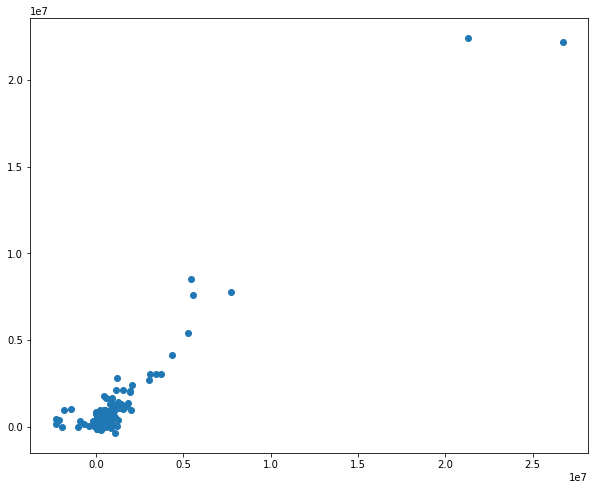

In [62]:
y_pred_train = lr.predict(x_train)
print(y_pred_train)

print(r2_score(y_train, y_pred_train))
plt.subplots(figsize=(10,8))
plt.scatter(y_train, y_pred_train)

0.5613324269531808

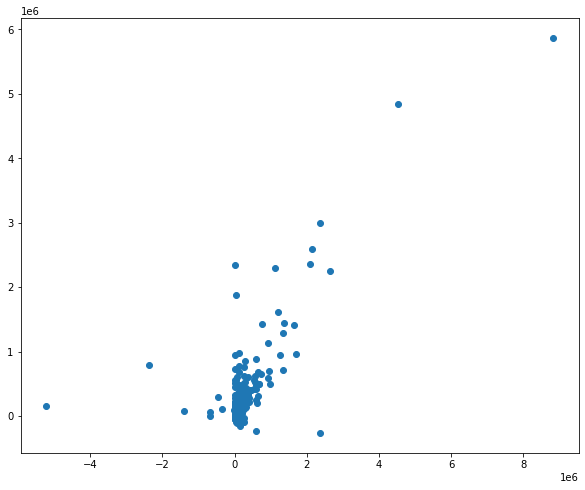

In [63]:
plt.subplots(figsize=(10,8))

r2_score(y_train, y_pred_train)

y_pred_test = lr.predict(x_test)

plt.scatter(y_test, y_pred_test)

r2_score(y_test, y_pred_test)